# importing Main Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

# Loading & Viewing Data

In [2]:
df=pd.read_csv('../Customer Segmentation  Clustering/customer_segmentation.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.dropna(subset='Income',inplace=True)

In [7]:
for x in df.columns:
    r=df[x].nunique()
    print(f'{x} : {r}')

ID : 2216
Year_Birth : 59
Education : 5
Marital_Status : 8
Income : 1974
Kidhome : 3
Teenhome : 3
Dt_Customer : 662
Recency : 100
MntWines : 776
MntFruits : 158
MntMeatProducts : 554
MntFishProducts : 182
MntSweetProducts : 176
MntGoldProds : 212
NumDealsPurchases : 15
NumWebPurchases : 15
NumCatalogPurchases : 14
NumStorePurchases : 14
NumWebVisitsMonth : 16
AcceptedCmp3 : 2
AcceptedCmp4 : 2
AcceptedCmp5 : 2
AcceptedCmp1 : 2
AcceptedCmp2 : 2
Complain : 2
Z_CostContact : 1
Z_Revenue : 1
Response : 2


In [22]:
df[df['Year_Birth']<=1900].index

Index([192, 239, 339], dtype='int64')

In [23]:
df.drop(df[df['Year_Birth']<=1900].index,inplace=True)

# ETL

In [26]:
df['Dt_Customer'].iloc[25]

'27-05-2013'

In [ ]:
'%d-%m-%Y'

In [29]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y',errors='coerce')

In [34]:
df['Dt_Customer_Year']=df['Dt_Customer'].dt.year
df['Dt_Customer_Month']=df['Dt_Customer'].dt.month_name()


In [36]:
df['Total_spent']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [38]:
df['Total_Purchases']=df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

# Visualization

## Education

In [44]:
df['Education'].value_counts()
edu=pd.DataFrame(df['Education'].value_counts())

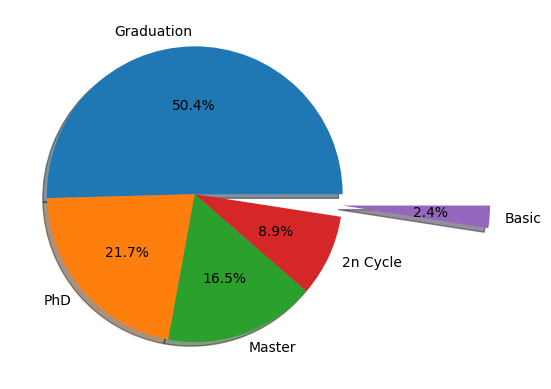

In [47]:
fig,ax=plt.subplots()
ax.pie(edu.values.squeeze(),labels=edu.index,autopct='%1.1f%%',explode=(0,0,0,0,1),shadow=True)
plt.show()

## Marital Status

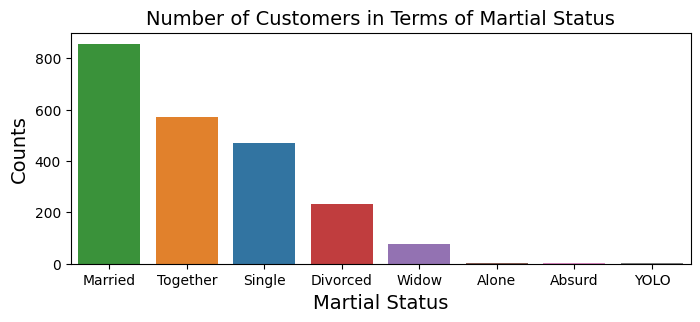

In [65]:
plt.figure(figsize=(8,3))

sns.countplot(data=df,x=df['Marital_Status'],order=df['Marital_Status'].value_counts().index,hue='Marital_Status')
plt.title('Number of Customers in Terms of Martial Status',fontsize=14,c='k')
plt.xlabel('Martial Status',fontsize=14,c='k')
plt.ylabel('Counts',fontsize=14,c='k')
plt.show()

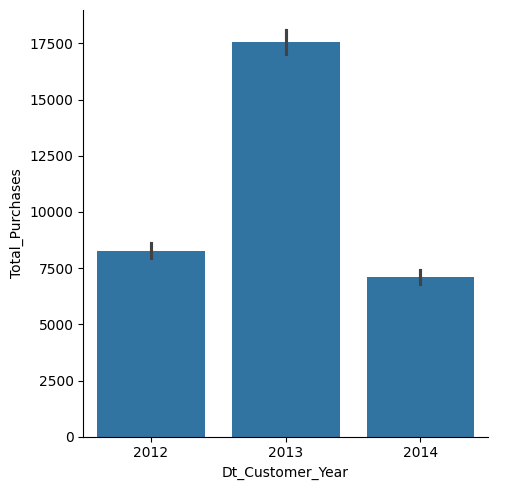

In [81]:
purch_order=df.sort_values('Total_purchases',ascending=False)
sns
